In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections

from pandas.tools.plotting import scatter_matrix
import nltk

from wordcloud import WordCloud
import itertools

In [2]:
# create loader object
L = instaloader.Instaloader()

# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='alpacino',password='al1123581321',authSource='InstaPublic1')
instagram_db = instagramClient["InstaPublic1"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]


LIST_ALL_HASHTAGS = [ 'sponsor', 'advertising' , 'advert', 'ad', 'spon', 'sponsored', 'giveaway']



In [3]:
df_posts = pd.DataFrame()

def plot_2():
    
    posts = list(instagram_col_post.find(
        {
            
        }
    ))
    #).limit(1000)
    
    global df_posts
    df_posts =  pd.DataFrame(posts)
#     return df

plot_2()

In [4]:
global df_posts

df_posts.columns

Index(['_id', 'associated_hashtag', 'caption', 'caption_hashtags',
       'caption_mentions', 'comments', 'crawl_hashtag', 'date_utc', 'is_video',
       'likes', 'location', 'mediaid', 'owener_profile_pic_url',
       'owner_biography', 'owner_followees', 'owner_followers',
       'owner_full_name', 'owner_id', 'owner_is_private', 'owner_is_verified',
       'owner_mediacount', 'owner_username', 'shortcode', 'tagged_users',
       'thumbnail', 'typename', 'url', 'video_url', 'viewer_has_liked'],
      dtype='object')

In [5]:
df_posts.head()

_id associated_hashtag  \
0  5c521a25b5d85c11e39e8621                NaN   
1  5c521a37b5d85c11e39e87ae                NaN   
2  5c521a4fb5d85c11e39e88d2                NaN   
3  5c521a60b5d85c11e39e8970                NaN   
4  5c521a79b5d85c11e39e8a76                NaN   

                                             caption  \
0  Shopping With Gm cars#istagood #fashionblogger...   
1  Good Saturday night With Gm cars#istagood #fas...   
2  @violetafabriccare za sva moja izdanja 😛😉 ❤️ #...   
3  It's all about the little things in life✨ Nema...   
4  Pampers or condoms? You pick! 🍑🍆👶🏽 Every Durex...   

                                    caption_hashtags  \
0  [istagood, fashionblogger, womanstyle, fashion...   
1  [istagood, fashionblogger, womanstyle, fashion...   
2                                        [sponsored]   
3                                        [sponsored]   
4                   [letdurexsayitforyou, sponsored]   

                       caption_mentions  comments crawl_hashtag  \
0  [rayban, celine, zara, louisvuitton]        21           NaN   
1  [rayban, celine, zara, louisvuitton]        10           NaN   
2                   [violetafabriccare]         1           NaN   
3                                    []         8           NaN   
4                [durex_usa, walgreens]         0           NaN   

             date_utc  is_video  likes        ...        owner_is_verified  \
0 2018-12-28 09:44:46     False    376        ...                    False   
1 2018-11-25 01:06:03     False    282        ...                    False   
2 2018-12-21 11:59:05     False    158        ...                    False   
3 2018-12-10 19:33:57     False    254        ...                    False   
4 2019-01-30 21:18:59     False      1        ...                    False   

   owner_mediacount      owner_username    shortcode  \
0                93  stellarussofficial  Br7Sso9HAJL   
1                93  stellarussofficial  BqlZGm4H9CR   
2              1909          ritarumora  BrpggTag2hi   
3              1909          ritarumora  BrN_0PtAv6l   
4               747     daaniellalozano  BtRgYJQnNxg   

                               tagged_users  \
0       [levis, louisvuitton, philippplein]   
1                                        []   
2  [tetavioletaofficial, violetafabriccare]   
3  [tetavioletaofficial, violetafabriccare]   
4                                        []   

                                           thumbnail    typename  \
0  b'/9j/4AAQSkZJRgABAQAAAQABAAD/7QB8UGhvdG9zaG9w...  GraphImage   
1  b'/9j/4AAQSkZJRgABAQAAAQABAAD/7QB8UGhvdG9zaG9w...  GraphImage   
2  b'/9j/4AAQSkZJRgABAQAAAQABAAD/7QB8UGhvdG9zaG9w...  GraphImage   
3  b'/9j/4AAQSkZJRgABAQAAAQABAAD/7QB8UGhvdG9zaG9w...  GraphImage   
4  b'/9j/4AAQSkZJRgABAQAAAQABAAD/7QB8UGhvdG9zaG9w...  GraphImage   

                                                 url  video_url  \
0  https://scontent-cdg2-1.cdninstagram.com/vp/05...       None   
1  https://scontent-cdg2-1.cdninstagram.com/vp/09...       None   
2  https://scontent-cdg2-1.cdninstagram.com/vp/76...       None   
3  https://scontent-cdg2-1.cdninstagram.com/vp/f9...       None   
4  https://scontent-cdg2-1.cdninstagram.com/vp/ed...       None   

   viewer_has_liked  
0              None  
1              None  
2              None  
3              None  
4              None  

[5 rows x 29 columns]

In [6]:
def plot_1_1():
    
    global df_posts
    
    # all posts & all hashtags
    print("All")
    hashtag = df_posts["caption_hashtags"].tolist()
    hashtag = list(itertools.chain.from_iterable(hashtag))
    counter = collections.Counter(hashtag)
  
    return counter.most_common(10)

plot_1_1()

All


[('ad', 1537),
 ('sponsored', 1268),
 ('advertising', 943),
 ('fashion', 377),
 ('marketing', 357),
 ('advert', 332),
 ('love', 286),
 ('instafashion', 256),
 ('blerjeonline', 249),
 ('shitjeonline', 249)]

In [ ]:
def plot_1():
    
    global df_posts
    
    # all posts & all hashtags
    print("All")
    hashtag = df_posts["caption_hashtags"].tolist()
    hashtag = list(itertools.chain.from_iterable(hashtag))
    counter = collections.Counter(hashtag)
    wordcloud = WordCloud(width = 2200, height = 910, background_color="white", max_words=200, contour_width=3, contour_color='steelblue').generate_from_frequencies(counter)
    plt.figure(figsize=[11,7]) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis("off") 
    plt.savefig('plot_influencer1_P1.pdf',bbox_inches='tight',pad_inches=0.3)
    

#     # sponsored hashtag
#     print("Sponsored")
#     df_sponsored = df_posts.loc[ 
#         df_posts['associated_hashtag'] == 'sponsored'
#     ]

#     hashtag_sponsored = df_sponsored["caption_hashtags"].tolist()
#     hashtag_sponsored = list(itertools.chain.from_iterable(hashtag_sponsored))
#     counter = collections.Counter(hashtag_sponsored)
#     wordcloud = WordCloud(width = 1500, height = 500, background_color="white", max_words=100, contour_width=3, contour_color='steelblue').generate_from_frequencies(counter)
#     plt.figure(figsize=(10,5))
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.show()
    
    
#     # sponsored ad
#     print("Ad")
#     df_ad = df_posts.loc[ 
#         df_posts['associated_hashtag'] == 'ad'
#     ]

#     hashtag_ad = df_ad["caption_hashtags"].tolist()
#     hashtag_ad = list(itertools.chain.from_iterable(hashtag_sponsored))
#     counter = collections.Counter(hashtag_ad)
#     wordcloud = WordCloud(width = 1000, height = 500, background_color="white", max_words=100, contour_width=3, contour_color='steelblue').generate_from_frequencies(counter)
#     plt.figure(figsize=(10,5))
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.show()
    
plot_1()

In [ ]:
def plot_3():
    
    global df_posts

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,4))
    
    
    # owner follower
    ser = df_posts[['owner_followers']].copy()
    ser = ser.sort_values(by='owner_followers')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Frequency"    
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label='owner_followers')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2)
    ax.set_ylabel("CDF")
    ax.set_title('a) Owner Followers')
    
    
    # owner followee
    ser = df_posts[['owner_followees']].copy()
    ser = ser.sort_values(by='owner_followees')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Frequency"    
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax2, legend=True, label='owner_followees')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2)
    ax.set_ylabel("CDF")
    ax.set_title('a) Owner Followees')
    
    
    # owner mediacount
    ser = df_posts[['owner_mediacount']].copy()
    ser = ser.sort_values(by='owner_mediacount')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Frequency"    
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax3, legend=True, label='Mediacount')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2)
    ax.set_ylabel("CDF")
    ax.set_title('a) Owner Mediacount')

    
    plt.savefig("plot_J1_P3.pdf")

plot_3()

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


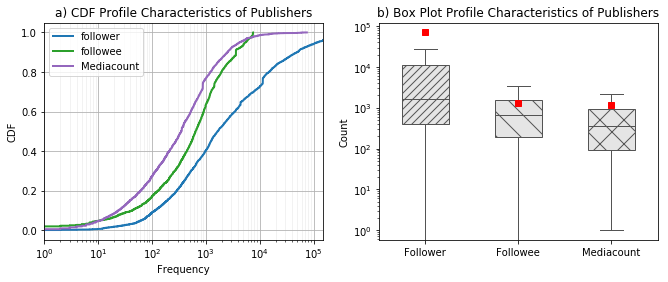

In [33]:
def plot_3_2():
    
    global df_posts

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
    
    
    # owner follower
    ser = df_posts[['owner_followers']].copy()
    ser = ser.sort_values(by='owner_followers')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)  
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label='follower')

    
    # owner followee
    ser = df_posts[['owner_followees']].copy()
    ser = ser.sort_values(by='owner_followees')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)   
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label='followee')
    
    # owner mediacount
    ser = df_posts[['owner_mediacount']].copy()
    ser = ser.sort_values(by='owner_mediacount')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Frequency"
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label='Mediacount')
    
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2)
    ax.set_ylabel("CDF")
    ax.set_title('a) CDF Profile Characteristics of Publishers')
    
    ax.axes.set_xlim([-1,150000])
#     ax.axes.set_ylim([-1,10000])


    
    df_posts_box = df_posts[['owner_followers', 'owner_followees', 'owner_mediacount']]
    df_posts_box.columns = ['Follower' , 'Followee', 'Mediacount']
    boxplot3 = sns.boxplot( data=df_posts_box, showfliers=False, width=0.5, palette="muted", linewidth=1, ax=ax2)#, showmeans=True)
    boxplot3.plot(df_posts_box.mean(), 'rs')
    boxplot3.set_yscale('log')
    boxplot3.set_ylabel("Count")
    boxplot3.set_title("b) Box Plot Profile Characteristics of Publishers")

    mybox = boxplot3.artists[0]
    mybox.set_facecolor('#e5e5e5')
    mybox.set(hatch = '///')


    mybox = boxplot3.artists[1]
    mybox.set_facecolor('#e5e5e5')
    mybox.set(hatch = '\\')
    
    mybox = boxplot3.artists[2]
    mybox.set_facecolor('#e5e5e5')
    mybox.set(hatch = '\\/')


#     dx = df_posts.boxplot(column=['owner_followers', 'owner_followees', 'owner_mediacount'], return_type='axes', ax=ax2, showfliers=False)
#     dx.plot(df_posts['owner_followers'].mean(), 'rs')
#     dx.set_yscale('log')   
    
    plt.savefig("plot_Influencer1_P3_2.pdf")

plot_3_2()

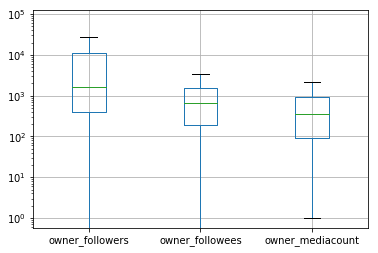

In [8]:
def plot_4():
    
    global df_posts

    dx = df_posts.boxplot(column=['owner_followers', 'owner_followees', 'owner_mediacount'], return_type='axes', showfliers=False)
    dx.plot(df_posts['owner_followers'].mean(), 'rs')
    dx.set_yscale('log')    
    
    plt.savefig("plot_Influencer1_P4.pdf")

plot_4()

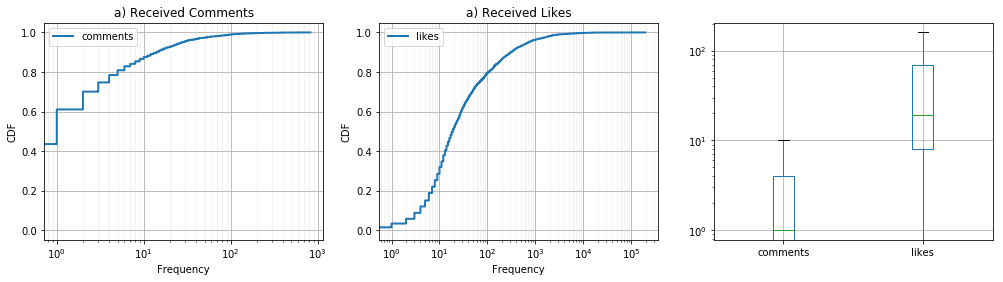

In [7]:
def plot_5():
    
    global df_posts

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,4))
    
    
    # Comments
    ser = df_posts[['comments']].copy()
    ser = ser.sort_values(by='comments')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Frequency"    
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label='comments')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2)
    ax.set_ylabel("CDF")
    ax.set_title('a) Received Comments')
    
    
    # Likes
    ser = df_posts[['likes']].copy()
    ser = ser.sort_values(by='likes')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Frequency"    
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax2, legend=True, label='likes')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2)
    ax.set_ylabel("CDF")
    ax.set_title('a) Received Likes')
    
    
    dx = df_posts.boxplot(column=['comments', 'likes'], ax=ax3, return_type='axes', showfliers=False)
#     dx.plot(df_posts['owner_followers'].mean(), 'rs')
    dx.set_yscale('log') 
    
    plt.savefig("plot_J1_P5.pdf")

plot_5()

In [ ]:
def plot_6():
    
    global df_posts

    df_posts['owner_is_verified'].value_counts().plot(kind='pie', figsize=(5, 5))
    plt.savefig("plot_J1_P6.pdf")

plot_6()

In [ ]:
def plot_7():
    
    global df_posts

    list_size = []
    for i in df_posts["caption_hashtags"]:
        list_size.append(len(i))
        
    data =  pd.DataFrame(list_size)
    data.columns = ['caption_hashtag']    
    ser = data[['caption_hashtag']].copy()
    ser = ser.sort_values(by='caption_hashtag')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Frequency"    
    ax = ser_cdf.plot(drawstyle='steps',logx=False, grid=True, linewidth=2, legend=True, label='Hashtag Frequency')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2)
    ax.set_ylabel("CDF")
    ax.set_title('a) Hashtags in Caption')


plot_7()

In [ ]:
def plot_8():
    
    global df_posts

    list_size = []
    for i in df_posts["caption_mentions"]:
        list_size.append(len(i))
        
    data =  pd.DataFrame(list_size)
    data.columns = ['caption_mentions']    
    ser = data[['caption_mentions']].copy()
    ser = ser.sort_values(by='caption_mentions')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Frequency"    
    ax = ser_cdf.plot(drawstyle='steps',logx=False, grid=True, linewidth=2, legend=True, label='Mention Frequency')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2)
    ax.set_ylabel("CDF")
    ax.set_title('a) Mentions in Post')


plot_8()

In [ ]:
df_comments = pd.DataFrame()
df_likes = pd.DataFrame()

def plot_9():
    
    comments = list(instagram_col_comment.find(
        {     }
    ))
    
    global df_comments
    df_comments =  pd.DataFrame(comments)
    
    
    likes = list(instagram_col_like.find(
        {     }
    ))
    
    global df_likes
    df_likes =  pd.DataFrame(likes)


plot_9()

In [ ]:
global df_comments
df_comments.columns

In [ ]:
global df_likes
df_likes.columns

In [ ]:
def plot_10():

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,4))
    
    comments = list(instagram_col_comment.aggregate([
        
        { '$match':
         { 
#              '$and': [ 
#                  { 'shortcode_username': USER_ACCOUNT },
#              ]
         }
        },

        {'$group':   {
            "_id": "$owener_id",
            "totalComment" : {"$sum" : 1},
            }
        },

    ])) 
  
    
    data =  pd.DataFrame(comments)
    ser = data[['totalComment']].copy()
    
    ser = ser.sort_values(by=['totalComment'])
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
#     ser_cdf.index.name = "Comments"    
    ax = ser_cdf.plot( logx=True, grid=True, linewidth=2, legend=True, label='Comment', ax=ax1, color='blue')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.3)
    ax.set_xlabel("Comments")
#     ax.yaxis.grid(True, which='minor', linestyle='-', alpha=0.3)
    ax.set_title("a) Portion of Unique user comments")
    ax.set_ylabel("CDF")

    
    
    likes = list(instagram_col_like.aggregate(pipeline=[
        
        {'$group':   {
            "_id": "$owener_id",
            "count" : {"$sum" : 1},
            }
        },

    ],
        allowDiskUse=True
    ))
    
    
    data2 =  pd.DataFrame(likes)
    ser2 = data2[['count']].copy()
    ser2 = ser2.sort_values(by=['count'])
    ser2[len(ser2)] = ser2.iloc[-1]
    cum_dist2 = np.linspace(0.,1.,len(ser2))
    ser_cdf2 = pd.Series(cum_dist2, index=ser2)
#     ser_cdf2.index.name = "Likes"    
    ax = ser_cdf2.plot( logx=True, grid=True, linewidth=2, legend=True, label='Like', ax=ax2, color='green')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2 )
    ax.set_ylabel("CDF")
    ax.set_xlabel("Likes")
    ax.set_title("b) Portion of Unique User Likes")


    
    ax = ser_cdf2.plot( logx=True, grid=True, legend=True, label='Like', ax=ax3, color='green')
    ax = ser_cdf.plot( logx=True, grid=True,  legend=True, label='Comment', ax=ax3, color='blue')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2 )
    ax.set_ylabel("CDF")
    ax.set_xlabel("Frequency")
    ax.set_title("c) Portion of unique user engagement")
    
plot_10()

In [ ]:
def plot_11():
    
    user_profile_from_comment = list(instagram_col_comment.aggregate(pipeline=[

        { '$match':
         { 
             '$and': [ 
                 { 'user_crawled': True }, 
                 { 'user_not_exists': None },
                 { 'shortcode_username': DONALD_TRUMP },
             ]
         }
        },

        { '$group':   
         {
            '_id': {'ownerid': "$owener_id"},
             'owener_followers' : { '$first': '$owener_followers' },
             'owener_followees' : { '$first': '$owener_followees' },
             'owener_mediacount' : { '$first': '$owener_mediacount' },
             'total': {'$sum': 1}
            }
        },

    ],
        allowDiskUse=True
    ))

    
    total_user_followers = []
    total_user_followees = []
    total_user_mediacount = []


    for user in user_profile_from_comment:
        if (user['owener_followers'] == "" or user['owener_followees'] == "" or user['owener_mediacount'] == ""):
            continue
        else:
            total_user_followers.append(user['owener_followers'])
            total_user_followees.append(user['owener_followees'])
            total_user_mediacount.append(user['owener_mediacount'])
            

#     fig = plt.figure(figsize=(6,4))
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,4))

    # followers
    data =  pd.DataFrame(total_user_followers)
    data.columns = ['followers']    
    ser = data[['followers']].copy()
    ser = ser.sort_values(by='followers')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Frequency"    
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label='D. Trump')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2)
    ax.set_ylabel("CDF")
    ax.set_title('a) Followers')
    
    
    
    # followees
    data =  pd.DataFrame(total_user_followees)
    data.columns = ['followees']    
    ser = data[['followees']].copy()
    ser = ser.sort_values(by='followees')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Frequency"    
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax2, legend=True, label='D. Trump')
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2)
    ax.set_ylabel("CDF")
    ax.set_title("b) Followees")
    
    
    # media count
    data =  pd.DataFrame(total_user_mediacount)
    data.columns = ['owener_mediacount']
    ser = data[['owener_mediacount']].copy()
    ser = ser.sort_values(by='owener_mediacount')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Frequency"    
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax3, legend=True, label='D. Trump' )
    ax.xaxis.grid(True, which='minor', linestyle='-', alpha=0.2)
    ax.set_ylabel("CDF")
    ax.set_title("c) Media Count")
    
    
    
    user_profile_from_comment = list(instagram_col_comment.aggregate(pipeline=[

        { '$match':
         { 
             '$and': [ 
                 { 'user_crawled': True }, 
                 { 'user_not_exists': None },
                 { 'shortcode_username': EMMANUEL_MACRON },
             ]
         }
        },

        { '$group':   
         {
            '_id': {'ownerid': "$owener_id"},
             'owener_followers' : { '$first': '$owener_followers' },
             'owener_followees' : { '$first': '$owener_followees' },
             'owener_mediacount' : { '$first': '$owener_mediacount' },
             'total': {'$sum': 1}
            }
        },

    ],
        allowDiskUse=True
    ))

    
    total_user_followers = []
    total_user_followees = []
    total_user_mediacount = []


    for user in user_profile_from_comment:
        if (user['owener_followers'] == "" or user['owener_followees'] == "" or user['owener_mediacount'] == ""):
            continue
        else:
            total_user_followers.append(user['owener_followers'])
            total_user_followees.append(user['owener_followees'])
            total_user_mediacount.append(user['owener_mediacount'])
            
            
    data =  pd.DataFrame(total_user_followers)
    data.columns = ['followers']    
    ser = data[['followers']].copy()
    ser = ser.sort_values(by='followers')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)  
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label='E. Macron')
    
    
    data =  pd.DataFrame(total_user_followees)
    data.columns = ['followees']    
    ser = data[['followees']].copy()
    ser = ser.sort_values(by='followees')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax2, legend=True, label='E. Macron')
    
    # media count
    data =  pd.DataFrame(total_user_mediacount)
    data.columns = ['owener_mediacount']
    ser = data[['owener_mediacount']].copy()
    ser = ser.sort_values(by='owener_mediacount')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax3, legend=True, label='E. Macron' )
    
    
    
    user_profile_from_comment = list(instagram_col_comment.aggregate(pipeline=[

        { '$match':
         { 
             '$and': [ 
                 { 'user_crawled': True }, 
                 { 'user_not_exists': None },
                 { 'shortcode_username': BARAK_OBAMA },
             ]
         }
        },

        { '$group':   
         {
            '_id': {'ownerid': "$owener_id"},
             'owener_followers' : { '$first': '$owener_followers' },
             'owener_followees' : { '$first': '$owener_followees' },
             'owener_mediacount' : { '$first': '$owener_mediacount' },
             'total': {'$sum': 1}
            }
        },

    ],
        allowDiskUse=True
    ))

    
    total_user_followers = []
    total_user_followees = []
    total_user_mediacount = []


    for user in user_profile_from_comment:
        if (user['owener_followers'] == "" or user['owener_followees'] == "" or user['owener_mediacount'] == ""):
            continue
        else:
            total_user_followers.append(user['owener_followers'])
            total_user_followees.append(user['owener_followees'])
            total_user_mediacount.append(user['owener_mediacount'])
            
            
    data =  pd.DataFrame(total_user_followers)
    data.columns = ['followers']    
    ser = data[['followers']].copy()
    ser = ser.sort_values(by='followers')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)  
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax1, legend=True, label='B. Obama')
    
    
    data =  pd.DataFrame(total_user_followees)
    data.columns = ['followees']    
    ser = data[['followees']].copy()
    ser = ser.sort_values(by='followees')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax2, legend=True, label='B. Obama')
    
    # media count
    data =  pd.DataFrame(total_user_mediacount)
    data.columns = ['owener_mediacount']
    ser = data[['owener_mediacount']].copy()
    ser = ser.sort_values(by='owener_mediacount')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ax = ser_cdf.plot(drawstyle='steps',logx=True, grid=True, linewidth=2, ax=ax3, legend=True, label='B. Obama' )
    
    
    plt.savefig("cdf_comment_features_all.pdf")

plot_11()